# EDA 1

In [ ]:
#!pip install --upgrade matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/slmsshk/DataSet/main/data_clean.csv',index_col=0)

In [3]:
data.head(5)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [4]:
#!pip install pandas==1.0.5

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


# Data type conversion

In [6]:
data.Weather=data.Weather.astype('category')
data.Weather.dtype

CategoricalDtype(categories=['C', 'PS', 'S'], ordered=False)

In [7]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [8]:
data.Month.value_counts()

9      34
8      31
7      31
5      31
6      30
May     1
Name: Month, dtype: int64

In [9]:
data.Month.replace('May',5,inplace=True)

In [10]:
data.Month=data['Month'].astype('int64')
data.Month.dtype

dtype('int64')

In [11]:
data['Temp C'].value_counts()

81    11
76    10
82     9
77     8
86     7
79     6
78     6
73     5
87     5
84     5
75     5
80     5
92     5
67     5
85     5
68     4
83     4
66     3
69     3
74     3
61     3
71     3
88     3
93     3
90     3
72     3
57     3
58     2
59     2
70     2
91     2
89     2
64     2
65     2
62     2
94     2
96     1
97     1
C      1
56     1
63     1
Name: Temp C, dtype: int64

In [12]:
data['Temp C'].replace('C',81,inplace=True)

In [13]:
data['Temp C'].value_counts()

81    11
76    10
82     9
77     8
86     7
78     6
79     6
85     5
84     5
87     5
75     5
73     5
80     5
92     5
67     5
68     4
83     4
69     3
74     3
66     3
61     3
88     3
93     3
72     3
90     3
71     3
57     3
62     2
91     2
59     2
70     2
58     2
89     2
64     2
65     2
94     2
81     1
56     1
63     1
97     1
96     1
Name: Temp C, dtype: int64

# Duplicates

In [14]:
data.duplicated().index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            149, 150, 151, 152, 153, 154, 155, 156, 157, 158],
           dtype='int64', length=158)

In [15]:
data.duplicated()
data.loc[157]
d1=data.drop_duplicates()
d1.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
153    False
154    False
155    False
156    False
158    False
Length: 157, dtype: bool

# Drop columns

In [16]:
d1.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp C', 'Month', 'Day', 'Year', 'Temp',
       'Weather'],
      dtype='object')

In [17]:
d2=d1.drop(['Temp C','Year'],axis=1)
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    119 non-null    float64 
 1   Solar.R  150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    157 non-null    int64   
 4   Day      157 non-null    int64   
 5   Temp     157 non-null    int64   
 6   Weather  154 non-null    category
dtypes: category(1), float64(3), int64(3)
memory usage: 8.8 KB


# Rename the columns

In [18]:
dit={'Solar.R':'Solar'}
d3=d2.rename(dit,axis=1)

In [19]:
d3

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


# Missing Values and Imputation

# Outlier Detection

<function matplotlib.pyplot.show(close=None, block=None)>

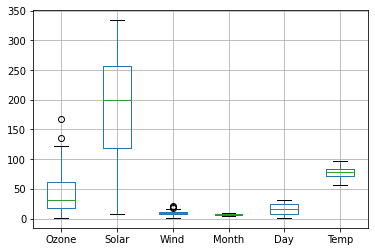

In [20]:
d3.boxplot(figsize=(15,10))
plt.show

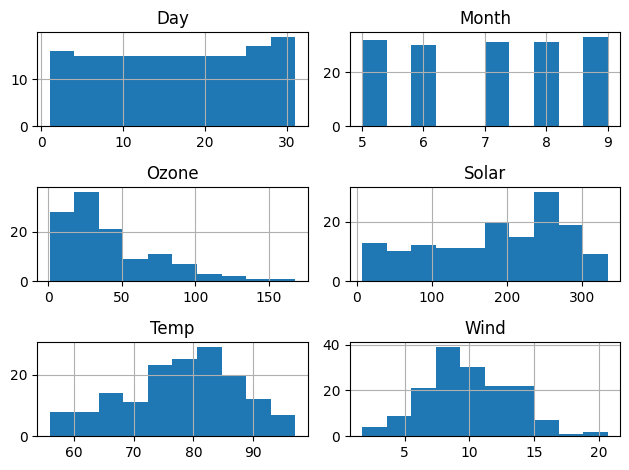

In [21]:
d3.hist()
plt.tight_layout()
plt.show()

In [22]:
d3.describe()

,Ozone,Solar,Wind,Month,Day,Temp
count,119.000000,150.000000,157.000000,157.000000,157.000000,157.000000
mean,41.815126,185.366667,9.929936,7.019108,15.929936,77.745223
std,32.659249,89.019146,3.505188,1.434338,8.974404,9.405334
min,1.000000,7.000000,1.700000,5.000000,1.000000,56.000000
25%,18.000000,118.500000,7.400000,6.000000,8.000000,72.000000
50%,31.000000,199.000000,9.700000,7.000000,16.000000,79.000000
75%,62.000000,257.500000,11.500000,8.000000,24.000000,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,97.000000


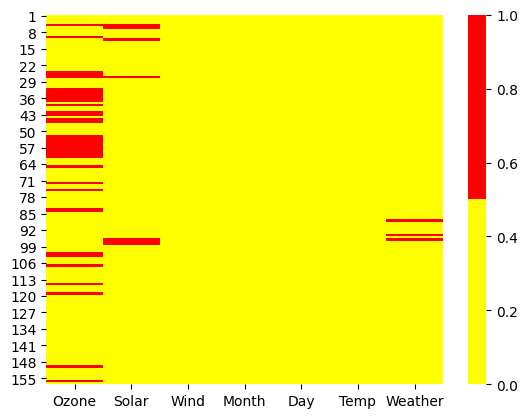

In [23]:
sns.heatmap(d3.isnull(),cmap=['yellow','red'])
plt.show()

In [24]:
mde=d3['Weather'].mode()[0]

In [25]:
d3['Weather'].fillna(mde,inplace=True)
d3.isnull()

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,True,False,False,False,False,False,False


In [26]:
d3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Temp        0
Weather     0
dtype: int64

In [27]:
(d3.isnull().sum()*100)/len(d3)

Ozone      24.203822
Solar       4.458599
Wind        0.000000
Month       0.000000
Day         0.000000
Temp        0.000000
Weather     0.000000
dtype: float64

In [28]:
d3['Ozone'].fillna(d3['Ozone'].median(),inplace=True)
d3.isnull()

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False


In [29]:
d3['Solar'].fillna(d3['Solar'].median(),inplace=True)
d3.isnull()

,Ozone,Solar,Wind,Month,Day,Temp,Weather
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False


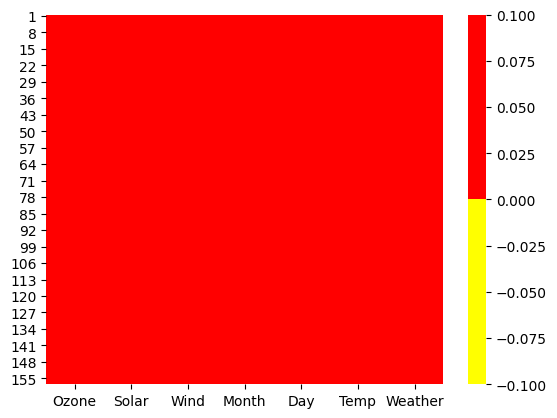

In [30]:
sns.heatmap(d3.isnull(),cmap=['yellow','red'])
plt.show()

# Scatter plot and Correlation analysis

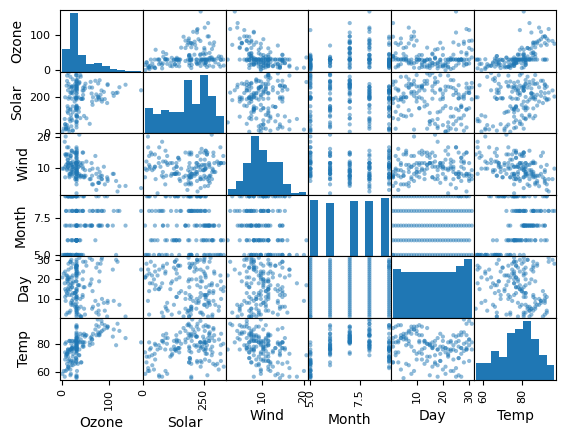

In [31]:
pd.plotting.scatter_matrix(d3)
plt.show()

In [32]:
d3.corr()

,Ozone,Solar,Wind,Month,Day,Temp
Ozone,1.000000,0.297561,-0.523738,0.171488,-0.031737,0.597087
Solar,0.297561,1.000000,-0.057709,-0.083788,-0.156243,0.256994
Wind,-0.523738,-0.057709,1.000000,-0.170328,0.029900,-0.441228
Month,0.171488,-0.083788,-0.170328,1.000000,0.041438,0.408060
Day,-0.031737,-0.156243,0.029900,0.041438,1.000000,-0.122787
Temp,0.597087,0.256994,-0.441228,0.408060,-0.122787,1.000000


# Transformations

## Dummy Variable

## Normalization of the data

# Speed up the EDA process

In [36]:
!pip install pandas-profiling===3.1.0
!pip install sweetviz

  Using cached https://files.pythonhosted.org/packages/b8/bb/7d1a8523711c7022601d17a8449b822dc5ffaf272692d3538771b0538631/pandas_profiling-3.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d1/c0/4fe04181b0210ee2647cfbb89ecd10a36eef89f10d8aca6a192c201bbe58/PyYAML-6.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/dc/bf/5965230bf0547c5fa0005984564146dcc414e6e8b6349177eca413761013/pydantic-1.10.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/66/00/166b2beb8046f06b77a2bf2c1dafeb52eff608f7dd420c767d5f3ce36ef5/visions-0.7.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d7/af/dc78890b3c119daa374bc61a674835d644ca08fac61b7f1d1477a36c6b85/phik-0.12.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/17/a2/be45b3bd2fe14cf9173f2337ab87a0f877d6847cf097e641eab4811a8b02/missingno-0.5.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/

Cannot uninstall 'PyYAML'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [40]:
!conda install -c conda-forge pandas-profiling=2.6.0

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https//conda.anaconda.org/conda-forge/win-64'




In [41]:
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
pandas_profiling

In [ ]:
pp=ProfileReport(d3)

In [ ]:
pp.to_file(output_file='report2.html')